In [8]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [9]:
employees_data = pd.read_excel("Employee Data Formatted - GBUS 738 Fall 2023 (1100 Records) f (1).xlsx")
employees_data.head()

,left_company,department,job_level,salary,weekly_hours,business_travel,yrs_at_company,yrs_since_promotion,previous_companies,job_satisfaction,performance_rating,marital_status,miles_from_home
0,Yes,Sales,Director,118680.739712,56,Rarely,6,0,5,Very High,Meets Expectations,Single,1
1,No,Sales,Senior Manager,85576.436791,42,Frequently,10,1,5,Medium,Exceeds Expectations,Married,8
2,Yes,Product Development,Associate,46235.785324,56,Rarely,0,0,6,High,Minimally Effective,Single,2
3,No,IT and Analytics,Director,117226.837499,50,Frequently,8,3,1,High,Exceptional,Married,3
4,No,Sales,Associate,36634.726485,46,Rarely,2,2,2,Medium,Exceeds Expectations,Married,2


In [10]:
employees_data.describe()

,salary,weekly_hours,yrs_at_company,yrs_since_promotion,previous_companies,miles_from_home
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,93727.331855,50.085455,7.080909,2.230000,3.260000,9.032727
std,37761.803551,4.904545,6.286299,3.298166,1.585202,8.077244
min,30488.149701,40.000000,0.000000,0.000000,1.000000,1.000000
25%,69896.092771,47.000000,3.000000,0.000000,2.000000,2.000000
50%,88377.681582,49.000000,5.000000,1.000000,3.000000,7.000000
75%,116290.429494,52.000000,9.000000,3.000000,4.000000,13.000000
max,212134.700550,66.000000,40.000000,15.000000,7.000000,29.000000


In [11]:
# getting some informations about the dataset
employees_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   left_company         1100 non-null   object 
 1   department           1100 non-null   object 
 2   job_level            1100 non-null   object 
 3   salary               1100 non-null   float64
 4   weekly_hours         1100 non-null   int64  
 5   business_travel      1100 non-null   object 
 6   yrs_at_company       1100 non-null   int64  
 7   yrs_since_promotion  1100 non-null   int64  
 8   previous_companies   1100 non-null   int64  
 9   job_satisfaction     1100 non-null   object 
 10  performance_rating   1100 non-null   object 
 11  marital_status       1100 non-null   object 
 12  miles_from_home      1100 non-null   int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 111.8+ KB


In [97]:
empty = employees_data.isnull()
empty.value_counts().reset_index()
# no empty columns or rows 

,left_company,department,job_level,salary,weekly_hours,business_travel,yrs_at_company,yrs_since_promotion,previous_companies,job_satisfaction,performance_rating,marital_status,miles_from_home,0
0,False,False,False,False,False,False,False,False,False,False,False,False,False,1100


In [12]:
employees_data['left_company'].value_counts()

No     915
Yes    185
Name: left_company, dtype: int64

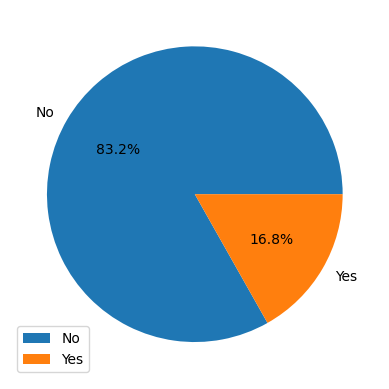

In [13]:
# the distribution of employees(left_company (Yes/No))
y=employees_data ['left_company'].value_counts()
labels=['No','Yes']
plt.pie(y,labels=labels,autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.show()

In [37]:
employee=employees_data.groupby("left_company")["salary"].mean().reset_index()
employee.head()

,left_company,salary
0,No,97151.010598
1,Yes,76794.001859


In [65]:
employee=employees_data.groupby("left_company")["marital_status"]
employee.value_counts()


left_company  marital_status
No            Married           421
              Single            268
              Divorced          226
Yes           Single            100
              Married            62
              Divorced           23
Name: marital_status, dtype: int64

In [67]:
employee=employees_data.groupby("left_company")["miles_from_home"].mean().reset_index()
employee.head()

,left_company,miles_from_home
0,No,8.778142
1,Yes,10.291892


In [68]:
employee=employees_data.groupby("left_company")["job_satisfaction"]
employee.value_counts()

left_company  job_satisfaction
No            Very High           309
              High                268
              Medium              173
              Low                 165
Yes           High                 63
              Low                  50
              Very High            39
              Medium               33
Name: job_satisfaction, dtype: int64

In [69]:
employee=employees_data.groupby("left_company")["job_level"]
employee.value_counts()

left_company  job_level     
No            Senior Manager    328
              Director          216
              Manager           196
              Vice President     90
              Associate          85
Yes           Manager            72
              Associate          55
              Director           25
              Senior Manager     22
              Vice President     11
Name: job_level, dtype: int64

In [71]:
employee=employees_data.groupby("left_company")["weekly_hours"].mean().reset_index()
employee.head()

,left_company,weekly_hours
0,No,48.351913
1,Yes,58.659459


In [74]:
employee=employees_data.groupby("left_company")["business_travel"]
employee.value_counts()

left_company  business_travel
No            Rarely             657
              Frequently         160
              None                98
Yes           Rarely             120
              Frequently          54
              None                11
Name: business_travel, dtype: int64

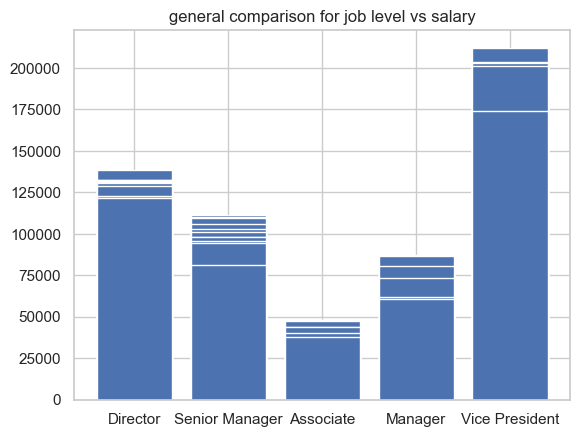

In [84]:
# job_level vs salary
x = employees_data ["job_level"]
y = employees_data["salary"]
plt.bar(x,y)
plt.title("general comparison for job level vs salary")
plt.show()

#### Is it true that most employees leave thecompany based on low salary?

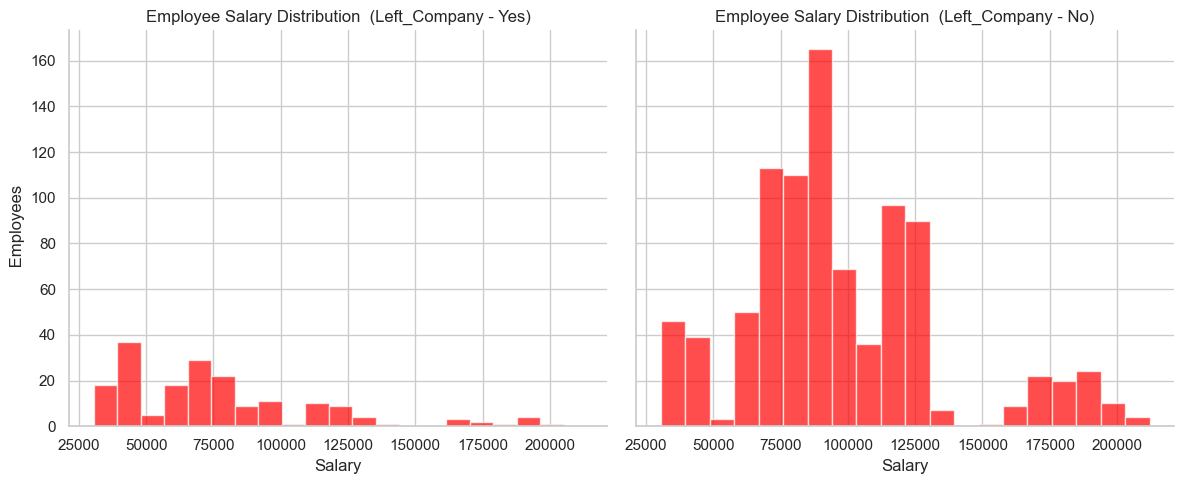

In [91]:
import seaborn as sns

# Assuming employee_data is a pandas DataFrame containing the relevant data
# Replace the column names accordingly
# employee_data should have columns 'salary' and 'left_company'

# Create the histogram plot using seaborn
sns.set(style="whitegrid")
g = sns.FacetGrid(employees_data, col="left_company", height=5, aspect=1.2)
g.map(plt.hist, 'salary', bins=20, color="red", edgecolor="white", alpha=0.7)

# Add labels and title
g.set_axis_labels("Salary", " Employees")
g.set_titles("Employee Salary Distribution  (Left_Company - {col_name})")

plt.tight_layout()
plt.show()

#### Did most employees leave the company due to overworking?

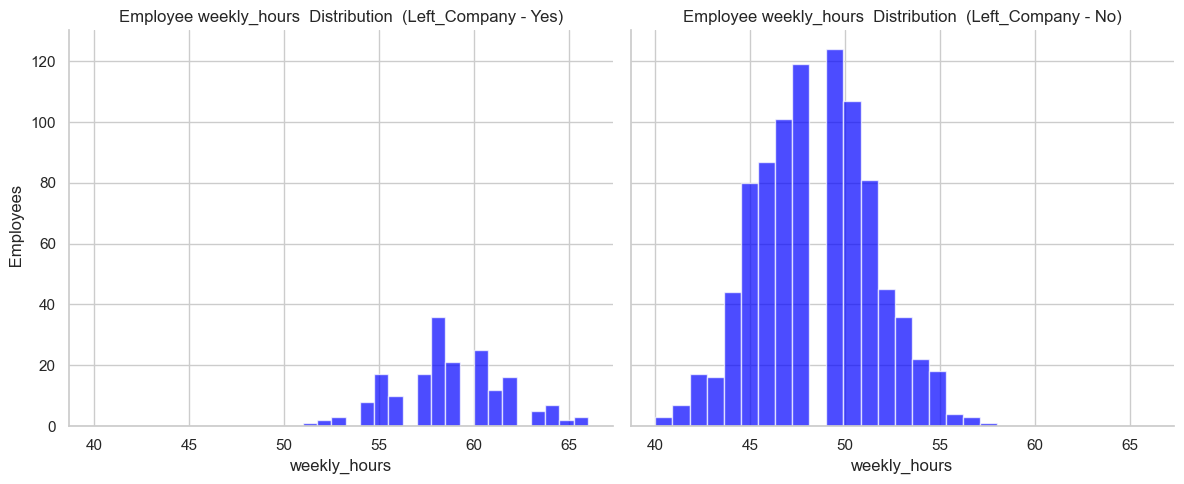

In [89]:
import seaborn as sns

# Assuming employee_data is a pandas DataFrame containing the relevant data
# Replace the column names accordingly
# employee_data should have columns 'salary' and 'left_company'

# Create the histogram plot using seaborn
sns.set(style="whitegrid")
g = sns.FacetGrid(employees_data, col="left_company", height=5, aspect=1.2)
g.map(plt.hist, 'weekly_hours', bins=20, color="blue", edgecolor="white", alpha=0.7)

# Add labels and title
g.set_axis_labels("weekly_hours", " Employees")
g.set_titles("Employee weekly_hours  Distribution  (Left_Company - {col_name})")

plt.tight_layout()
plt.show()

##### did most employees leave dew to long distance from home?

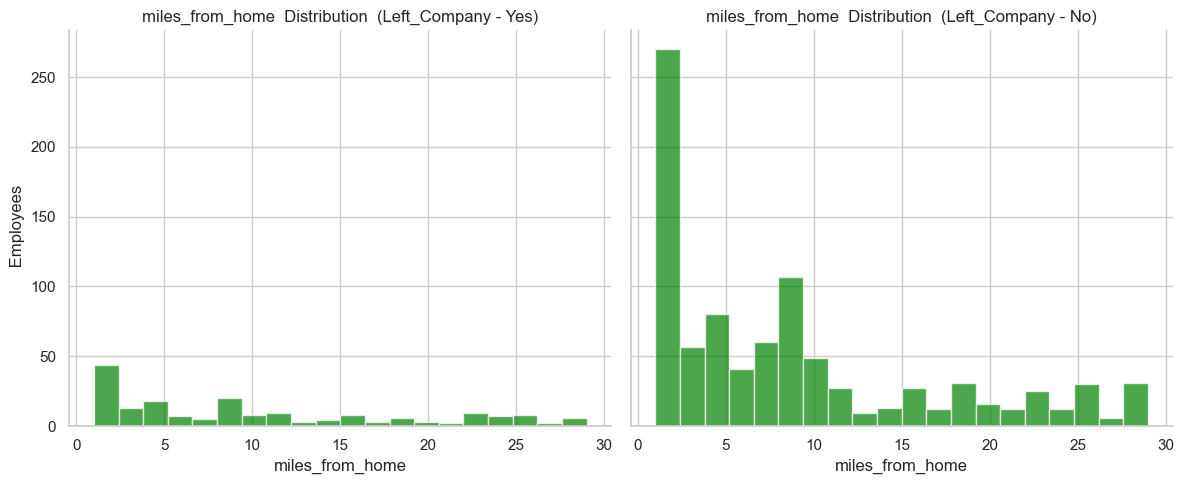

In [92]:
import seaborn as sns

sns.set(style="whitegrid")
g = sns.FacetGrid(employees_data, col="left_company", height=5, aspect=1.2)
g.map(plt.hist, 'miles_from_home', bins=20, color="green", edgecolor="white", alpha=0.7)

g.set_axis_labels("miles_from_home", " Employees")
g.set_titles("miles_from_home  Distribution  (Left_Company - {col_name})")

plt.tight_layout()
plt.show()

#### did most employees leave due to limited business travels?

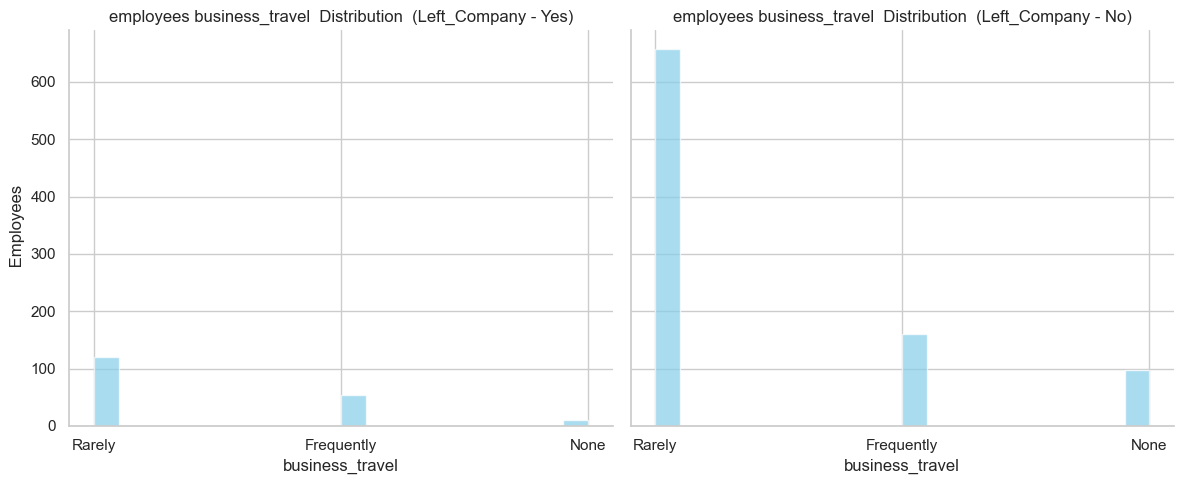

In [94]:
import seaborn as sns

sns.set(style="whitegrid")
g = sns.FacetGrid(employees_data, col="left_company", height=5, aspect=1.2)
g.map(plt.hist, 'business_travel', bins=20, color="skyblue", edgecolor="white", alpha=0.7)

g.set_axis_labels("business_travel", " Employees")
g.set_titles("employees business_travel  Distribution  (Left_Company - {col_name})")

plt.tight_layout()
plt.show()

#### does lack of promotion leads to employees leaving the company?

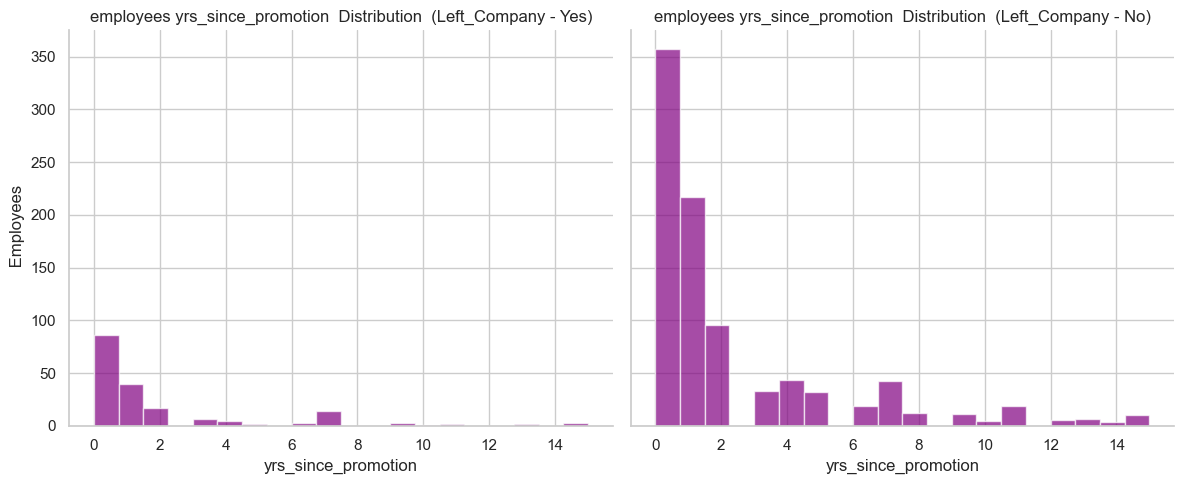

In [100]:
import seaborn as sns

sns.set(style="whitegrid")
g = sns.FacetGrid(employees_data, col="left_company", height=5, aspect=1.2)
g.map(plt.hist, 'yrs_since_promotion', bins=20, color="purple", edgecolor="white", alpha=0.7)

g.set_axis_labels("yrs_since_promotion", " Employees")
g.set_titles("employees yrs_since_promotion  Distribution  (Left_Company - {col_name})")

plt.tight_layout()
plt.show()

#### does the salaries match the job_level?

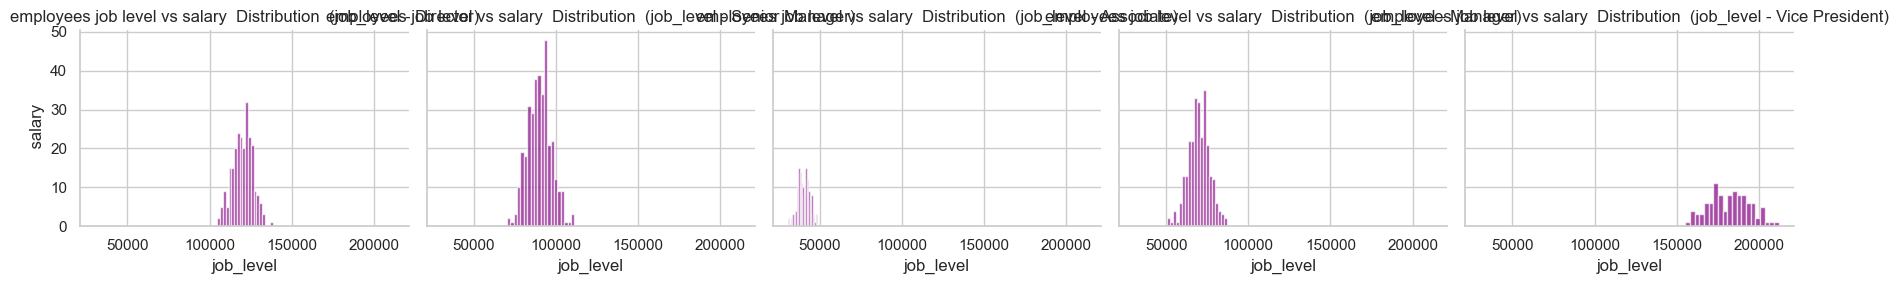

In [121]:
import seaborn as sns

sns.set(style="whitegrid")
g = sns.FacetGrid(employees_data, col="job_level", height=3, aspect=1.2)
g.map(plt.hist, 'salary', bins=20, color="purple", edgecolor="white", alpha=0.7)

g.set_axis_labels("job_level", " salary")
g.set_titles("employees job level vs salary  Distribution  (job_level - {col_name})")

plt.tight_layout()
plt.show()

#### does the salary match the weekly_hours?

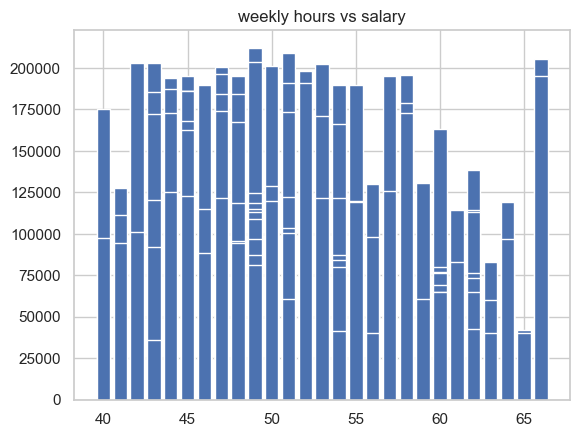

In [123]:
import seaborn as sns
x = employees_data ["weekly_hours"]
y = employees_data ["salary"]
plt.bar(x,y)
plt.title("weekly hours vs salary")
plt.show()
